In [20]:
import pandas as pd

from route_66.visualisation import plot_simulation, plot_batch_run

# Simulational Analysis
Jupyter Notebook for the assignment 'Touring Machines' for the course Simulation Tooling for the bachelor programme Artificial Intelligence at the HU University of Applied Sciences Utrecht

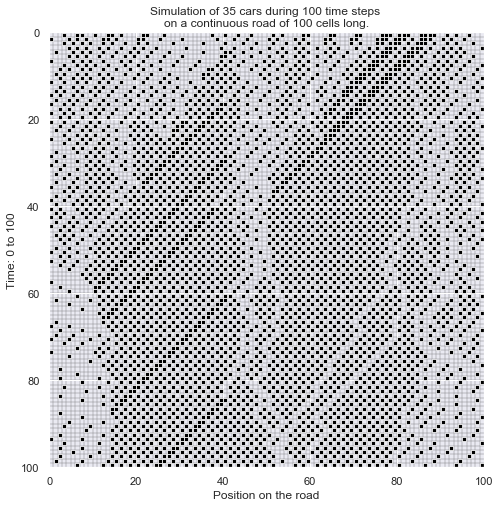

In [21]:
plot_simulation(100, 35, length=100, p=0.3, grid=True)

## Analysis
### Plot
Plot containing boxplots visualising the effects of timer length and initial number of cars on average velocity:

360it [00:33, 10.84it/s]


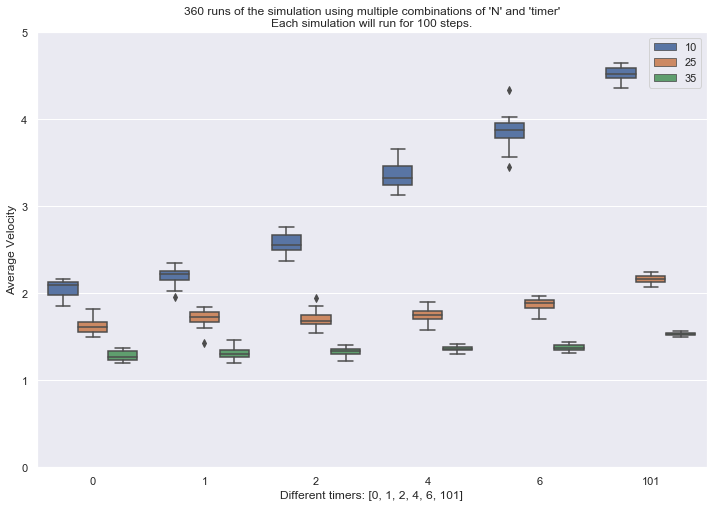

,N,timer,Run,Average Velocity,On Ramp Queue,Standard Deviation,Waiting Queue,length,lanes
0,10,0,1,1.997248,58,1.591912,101,100,1
1,10,0,2,2.128641,59,1.719374,101,100,1
2,10,0,3,2.087886,57,1.720313,101,100,1
3,10,0,4,1.899221,60,1.521286,101,100,1
4,10,0,5,2.010608,61,1.641503,101,100,1
...,...,...,...,...,...,...,...,...,...
355,35,101,356,1.547714,0,0.844096,201,100,1
356,35,101,357,1.536000,0,0.815410,201,100,1
357,35,101,358,1.545714,0,0.828143,201,100,1
358,35,101,359,1.501429,0,0.945045,201,100,1


In [71]:
data = plot_batch_run(N=[10, 25, 35], timer=[0, 1, 2, 4, 6, 101], iterations=20)

### Using Pandas


In [23]:
# Drop Run, length and lanes, and group Dataframe by initial cars on road 
N_data = data[["timer", "N", "Average Velocity", "Standard Deviation"]].groupby("N")

# For each group, split from dataframe, group by timer, find mean for velocity and STD, sort by Average velocity
timer_data = [N_data.get_group(x).groupby("timer").mean().sort_values("Average Velocity", ascending=False) for x in N_data.groups]
print(timer_data[0])

        N  Average Velocity  Standard Deviation
timer                                          
101    10          4.551750            0.701973
6      10          3.756133            1.358451
4      10          3.410149            1.535461
2      10          2.557575            1.726608
1      10          2.220013            1.693527
0      10          2.090123            1.687251


In [24]:
mean_data = pd.concat(timer_data)
mean_data

,N,Average Velocity,Standard Deviation
timer,,,
101,10,4.551750,0.701973
6,10,3.756133,1.358451
4,10,3.410149,1.535461
2,10,2.557575,1.726608
1,10,2.220013,1.693527
0,10,2.090123,1.687251
101,25,2.147000,1.260898
6,25,1.840044,1.261351
4,25,1.764773,1.240695


For each variation of N, the timer with a length of 6 grants the greatest average average velocity. It usually also grants a lower or the lowest average standard deviation for its N.   

The greater the amount of initial cars, the lesser the impact of timer length. 


## t-test
The t-test compares two means (averages) and tells the user if they are different from each other.
Furthermore the t-test also tells how significant the differences are.  
It lets you know if those differences could have happened by chance.  
  
The t-score is a ratio between the difference between two groups and the difference within the groups.
The larger the t-score, the more difference there is between the two groups.
Oppositely; the smaller the t-score, the more similarity there is between groups.  
  
Every t-value has a p-value to go with it.
A p-value is the probability that the results from your sample data occurred by chance.
Low p-values are good; They indicate that your data did not occur by chance.

In [143]:
import scipy.stats as sc
import pprint as pp

test_data = data
test_data = test_data[["N", "timer", "Average Velocity", "Standard Deviation"]].groupby('N')

result = []

for table in test_data:
    h_0 = table[1]['Average Velocity'][table[1]['timer'] == 101]
    
    for interval in table[1]['timer'].unique()[:-1]:
        h_1 = table[1]['Average Velocity'][table[1]['timer'] == interval]
        t_test = sc.ttest_ind(h_0, h_1, axis=0, equal_var=False)
        result.append([table[0], 101, interval, t_test[0], t_test[1]])

df_result = pd.DataFrame(result, columns = ['N', 'base', 'interval', 't-value', 'p-value'])
df_result     

,N,base,interval,t-value,p-value
0,10,101,0,86.254320,5.796230e-44
1,10,101,1,78.627360,7.461897e-42
2,10,101,2,58.388616,1.476552e-34
3,10,101,4,30.911921,4.655794e-24
4,10,101,6,13.916659,2.322776e-13
5,25,101,0,22.214329,1.105238e-18
6,25,101,1,19.122878,2.788033e-17
7,25,101,2,18.477167,1.553367e-16
8,25,101,4,21.149410,4.921855e-20
9,25,101,6,15.278591,4.018370e-16


As can be seen in the created table the t-values between the base and intervals at a low N are significantly higher
than the t-values at higher N's. This means that the differences between the groups at a lower N are greater than the
differences at a higher N and that there is a more significant difference between these two groups.  
Furthermore the p-values are extremely low which means that our sample data has a high probability that it occured by chance.


